# Electromiografía: Detección de amplitud máxima.
### Flores Oliva Alejandro Elliot
#### Licenciatura en Física Biomédica en Ciencias Biológicas , Facultad de Ciencias, Universidad Nacional Autónoma de México.

## Índice:

[1. Amplitud máxima del registro EMG.](#1)

[2. Amplitud máxima del registro EMG con filtro Wiener.](#2)

[3. Amplitud máxima del registro EMG con filtro mediano.](#3)

[4. Amplitud máxima del registro EMG con filtro Butterworth.](#4)

[5. Amplitud máxima del registro EMG con filtro Savitzky-Golay.](#5)


## Amplitud máxima

En el contexto de la electromiografía (EMG), la amplitud máxima se refiere al valor máximo de amplitud de las señales capturadas por los electrodos colocados en los músculos. Existen limitaciones como la calibración del equipo, la amplitud máxima varia según el músculo evaluado y la tarea realizada.

Encontrar la amplitud máxima en las señales EMG puede ser útil por varias razones:

>**Detección de activación muscular:** La amplitud máxima puede ayudar a identificar períodos de activación muscular, al superar un umbral determinado, se puede considerar que el músculo está activo, nos permiten identificar períodos de activación muscular en una señal EMG.

>**Evaluación de la intensidad (amplitud) de la contracción muscular:** La amplitud máxima puede ser un indicador de la intensidad o fuerza de la contracción muscular. 

>>Cuando hay mayor amplitud, mayor es la fuerza muscular generada.

>>A medida que los músculos se fatigan, la amplitud máxima puede disminuir, esto que indica una disminución en la capacidad contráctil sucede al mantener una contracción.


**La amplitud de la señal EMG puede proporcionar información valiosa sobre la actividad eléctrica de los músculos y su contracción.**

##### Librerías utilizadas
Importamos las librerías/ módulos que nos permitirán hacer cálculos, filtrar datos, utilizar filtros, análisis, etc.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import wavfile
from scipy.signal import find_peaks
from scipy.signal import savgol_filter
from scipy.signal import butter, filtfilt
from scipy.signal import medfilt
from scipy.signal import wiener

In [2]:
# Ruta del archivo .wav
archivo = "../Parkinson Notebooks/1-Registros-EMG/29-01/Registro_AbdCorto_Relajación.wav"

# Leer archivo .wav
sample_rate, data = wavfile.read(archivo)

# Obtener canales izquierdo y derecho
channel_left = data[:, 0]
channel_right = data[:, 1]

#Aplicar un umbral
threshold = 350

<a id='1'></a>
##  Amplitud máxima del registro EMG (sin filtro).

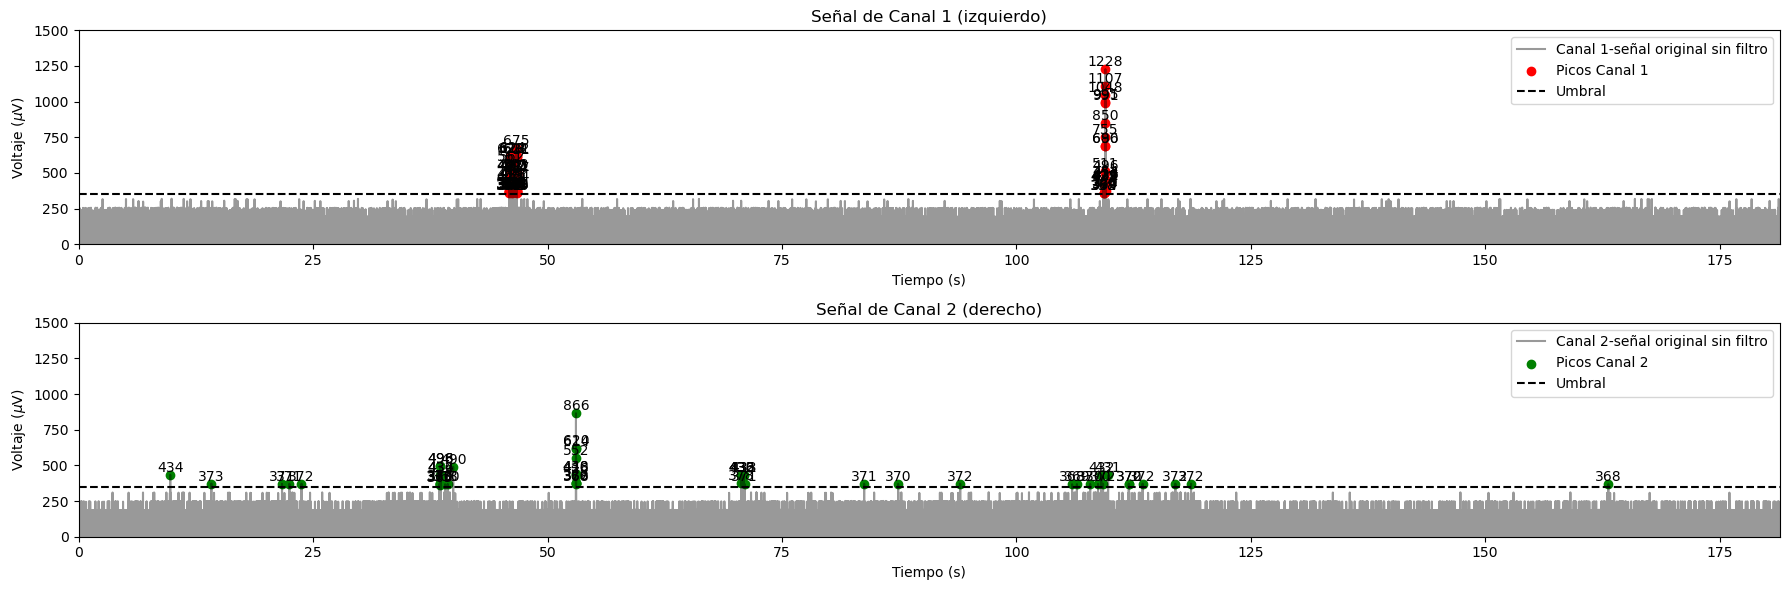

Amplitud máxima del Canal 1: 1228
Amplitud máxima del Canal 2: 866
Tabla de picos máximos del Canal 1:
Tiempo (seg)	Valor
Canal 1	45.92662531057766	364
Canal 1	45.92682531068789	425
Canal 1	45.92702531079811	362
Canal 1	45.932925314049655	435
Canal 1	45.93322531421499	372
Canal 1	45.935025315206985	371
Canal 1	45.935525315482536	369
Canal 1	45.99352534744688	425
Canal 1	45.99902535047798	561
Canal 1	45.999425350698424	620
Canal 1	46.00082535146998	497
Canal 1	46.001525351855754	493
Canal 1	46.001825352021086	368
Canal 1	46.002025352131305	367
Canal 1	46.226525475855354	362
Canal 1	46.230425478004676	441
Canal 1	46.23082547822512	624
Canal 1	46.23112547839045	436
Canal 1	46.231425478555785	497
Canal 1	46.231725478721124	433
Canal 1	46.233525479713116	618
Canal 1	46.2471254872082	364
Canal 1	46.2525254901842	562
Canal 1	46.25282549034953	622
Canal 1	46.254525491286415	371
Canal 1	46.254725491396634	370
Canal 1	46.25512549161708	492
Canal 1	46.4465255970994	367
Canal 1	46.44702559737496	3

In [9]:
duration = len(data) / sample_rate  # Duración en segundos
time = np.linspace(0, duration, len(data))  # Eje temporal

# Canal 1 (valores absolutos positivos)
channel1 = np.abs(data[:, 0])

# Canal 2 (valores absolutos positivos)
channel2 = np.abs(data[:, 1])

# Calcular los picos para cada canal con valores absolutos positivos y umbral de 350
peaks_channel1, _ = find_peaks(channel1, height=threshold)
peaks_channel2, _ = find_peaks(channel2, height=threshold)

# Calcular la amplitud máxima para cada canal
amplitude_max_channel1 = np.max(channel1)
amplitude_max_channel2 = np.max(channel2)

# Graficar los picos y la amplitud máxima para cada canal
plt.figure(figsize=(18, 6))

# Canal 1
plt.subplot(211)
plt.plot(time, channel1, label='Canal 1-señal original sin filtro', color='black', alpha=0.4)
plt.scatter(time[peaks_channel1], channel1[peaks_channel1], color='r', label='Picos Canal 1')
plt.axhline(y=threshold, color='k', linestyle='--', label='Umbral')
plt.xlabel('Tiempo (s)')
plt.xlim(0,max(time))
plt.ylabel('Voltaje ($\mu$V)')
plt.ylim(0,1500)
plt.title('Señal de Canal 1 (izquierdo)')
plt.legend()

# Etiquetar los puntos en la gráfica con su valor numérico
for peak in peaks_channel1:
    plt.text(time[peak], channel1[peak], str(channel1[peak]), ha='center', va='bottom')

# Canal 2
plt.subplot(212)
plt.plot(time, channel2, label='Canal 2-señal original sin filtro', color='black', alpha=0.4)
plt.scatter(time[peaks_channel2], channel2[peaks_channel2], color='g', label='Picos Canal 2')
plt.axhline(y=threshold, color='k', linestyle='--', label='Umbral')
plt.xlabel('Tiempo (s)')
plt.xlim(0,max(time))
plt.ylabel('Voltaje ($\mu$V)')
plt.ylim(0,1500)
plt.title('Señal de Canal 2 (derecho)')
plt.legend()

# Etiquetar los puntos en la gráfica con su valor numérico
for peak in peaks_channel2:
    plt.text(time[peak], channel2[peak], str(channel2[peak]), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Imprimir la amplitud máxima para cada canal
print('Amplitud máxima del Canal 1:', amplitude_max_channel1)
print('Amplitud máxima del Canal 2:', amplitude_max_channel2)

# Crear tabla con los picos máximos encontrados para cada canal y su valor
table_channel1 = []
table_channel2 = []
for peak in peaks_channel1:
    table_channel1.append(['Canal 1', time[peak], channel1[peak]])
for peak in peaks_channel2:
    table_channel2.append(['Canal 2',time[peak], channel2[peak]])

# Imprimir tabla para Canal 1
print('Tabla de picos máximos del Canal 1:')
print('Tiempo (seg)\tValor')
for row in table_channel1:
    print('\t'.join(str(item) for item in row))

# Imprimir tabla para Canal 2
print('Tabla de picos máximos del Canal 2:')
print('Tiempo (seg)\tValor')
for row in table_channel2:
    print('\t'.join(str(item) for item in row))

<a id='2'></a>
##  Amplitud máxima del registro EMG con filtro Wiener

Amplitud máxima: 734.6190476190476


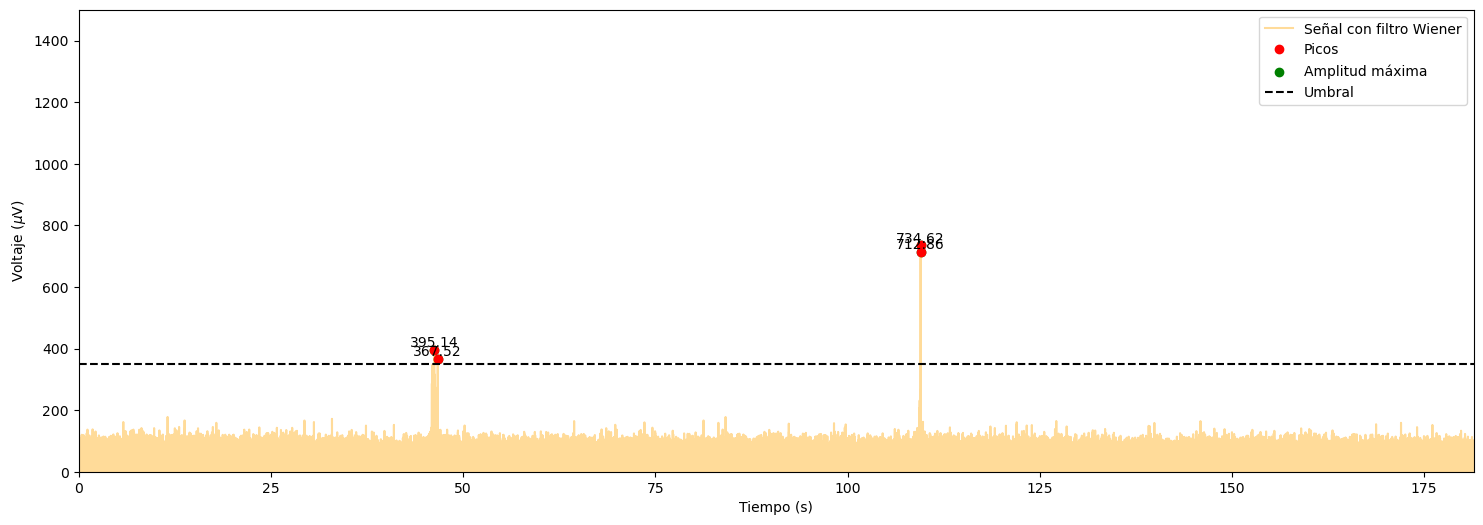

Amplitud máxima: 410.7142857142857


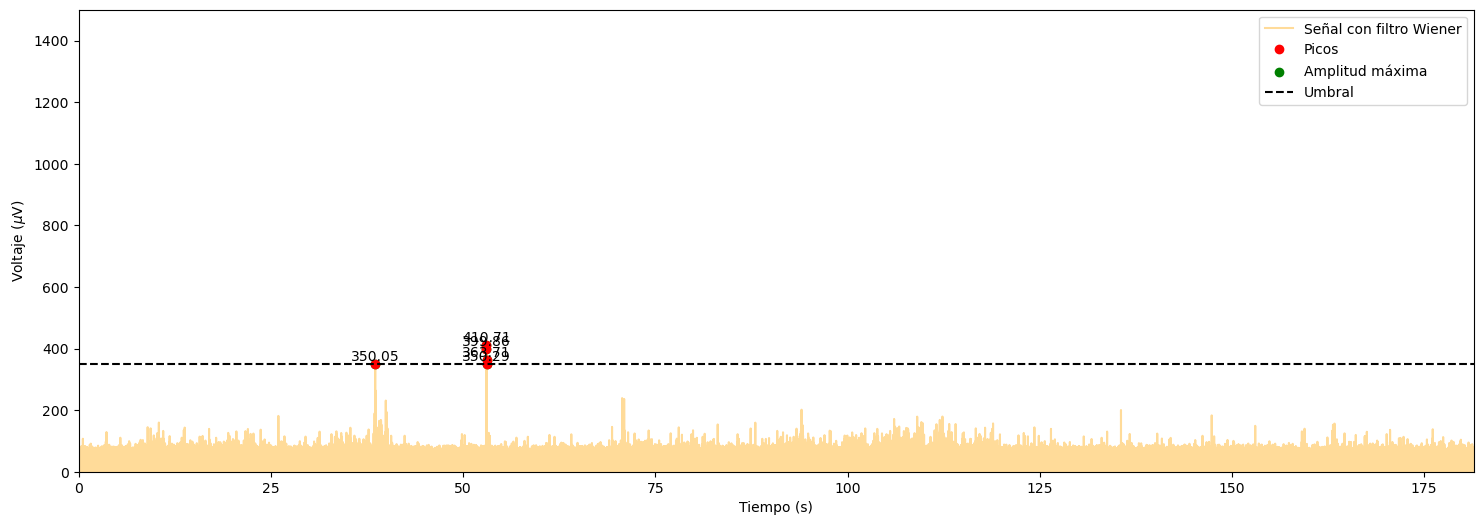

Tabla de picos y amplitudes (Canal Izquierdo):
   Tiempo (segundos)    Amplitud
0            46.2311  395.142857
1            46.6936  367.523810
2           109.4991  734.619048
3           109.5033  712.857143
Tabla de picos y amplitudes (Canal Derecho):
   Tiempo (segundos)    Amplitud
0            38.5582  350.047619
1            53.0300  410.714286
2            53.0304  399.857143
3            53.0340  350.285714
4            53.0343  363.714286


In [4]:
# Función para aplicar el filtro Wiener a un canal
def apply_wiener_filter(channel, kernel_size):
    filtered_channel = wiener(channel, mysize=kernel_size)
    return filtered_channel

# Aplicar filtro Wiener a los canales
kernel_size = 21
filtered_channel_left = apply_wiener_filter(channel_left, kernel_size)
filtered_channel_right = apply_wiener_filter(channel_right, kernel_size)

# Función para graficar los picos y la amplitud máxima
def plot_results(channel, peaks, amplitudes, sample_rate):
    # Calcular el tiempo en segundos
    time = np.arange(len(channel)) / sample_rate

    # Crear una matriz con los valores de amplitud máxima para cada punto
    max_amplitudes = np.zeros_like(channel)
    max_amplitudes[peaks] = amplitudes

    # Graficar señal, picos y amplitud máxima
    plt.figure(figsize=(18, 6))
    plt.plot(time, channel, label='Señal con filtro Wiener', color='orange', alpha=0.4)
    plt.plot(time[peaks], channel[peaks], 'ro', label='Picos')
    plt.scatter(time[peaks], max_amplitudes[peaks], c='g', label='Amplitud máxima', marker='o')
    for i, (t, a) in enumerate(zip(time[peaks], max_amplitudes[peaks])):
        plt.text(t, a, f"{a:.2f}", ha='center', va='bottom')
    plt.axhline(y=threshold, color='k', linestyle='--', label='Umbral')
    plt.xlabel('Tiempo (s)')
    plt.xlim(0,max(time))
    plt.ylabel('Voltaje ($\mu$V)')
    plt.ylim(0,1500)
    plt.legend()
    plt.show()

# Función para encontrar los picos y la amplitud máxima
def find_peaks_and_amplitude(channel):
 
    # Encontrar picos con el umbral
    peaks, _ = find_peaks(channel, height=threshold)

    # Calcular la amplitud máxima para los picos
    amplitudes = np.abs(channel[peaks])

    # Imprimir la amplitud máxima
    max_amplitude = np.max(amplitudes)
    print(f"Amplitud máxima: {max_amplitude}")

    # Generar tabla con los puntos encontrados y sus valores
    peaks_table = pd.DataFrame({'Tiempo (segundos)': peaks / sample_rate, 'Amplitud': amplitudes})

    return peaks, amplitudes, peaks_table

# Encontrar picos y amplitud máxima para el canal izquierdo
peaks_left, amplitudes_left, peaks_table_left = find_peaks_and_amplitude(np.abs(filtered_channel_left))

# Graficar picos y amplitud máxima para el canal izquierdo
plot_results(np.abs(filtered_channel_left), peaks_left, amplitudes_left, sample_rate)

# Encontrar picos y amplitud máxima para el canal derecho
peaks_right, amplitudes_right, peaks_table_right = find_peaks_and_amplitude(np.abs(filtered_channel_right))

# Graficar picos y amplitud máxima para el canal derecho
plot_results(np.abs(filtered_channel_right), peaks_right, amplitudes_right, sample_rate)

# Imprimir tabla de picos y amplitudes para el canal izquierdo
print("Tabla de picos y amplitudes (Canal Izquierdo):")
print(peaks_table_left)

# Imprimir tabla de picos y amplitudes para el canal derecho
print("Tabla de picos y amplitudes (Canal Derecho):")
print(peaks_table_right)

<a id='3'></a>
##  Amplitud máxima del registro EMG con filtro mediano

Amplitud máxima: 1107


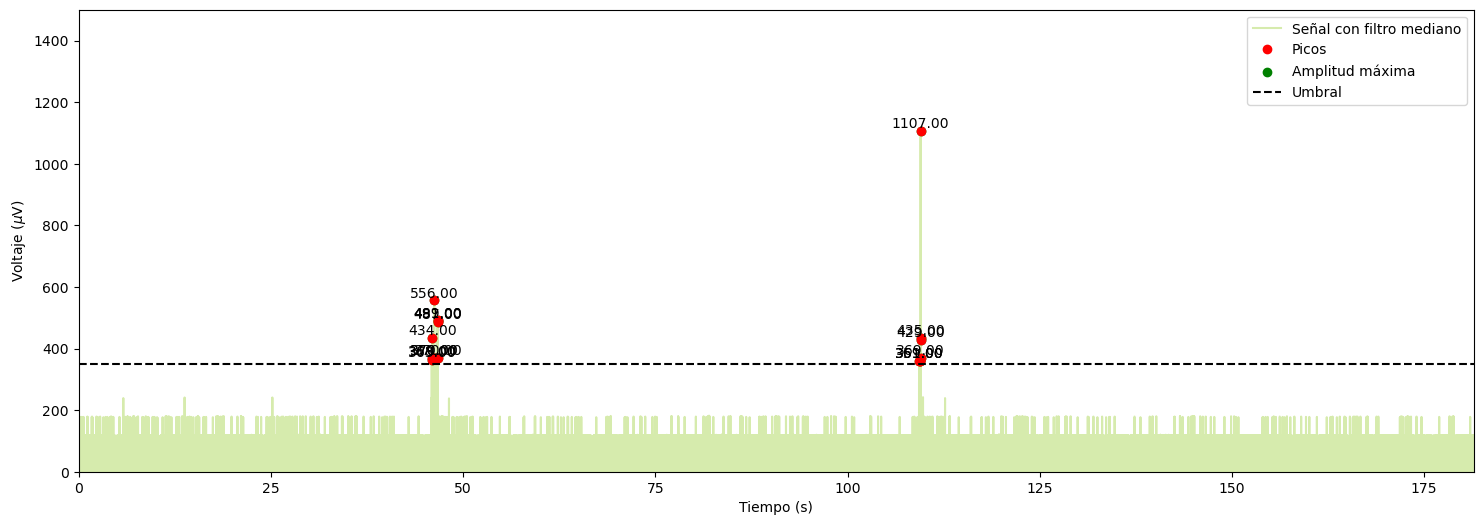

Amplitud máxima: 681


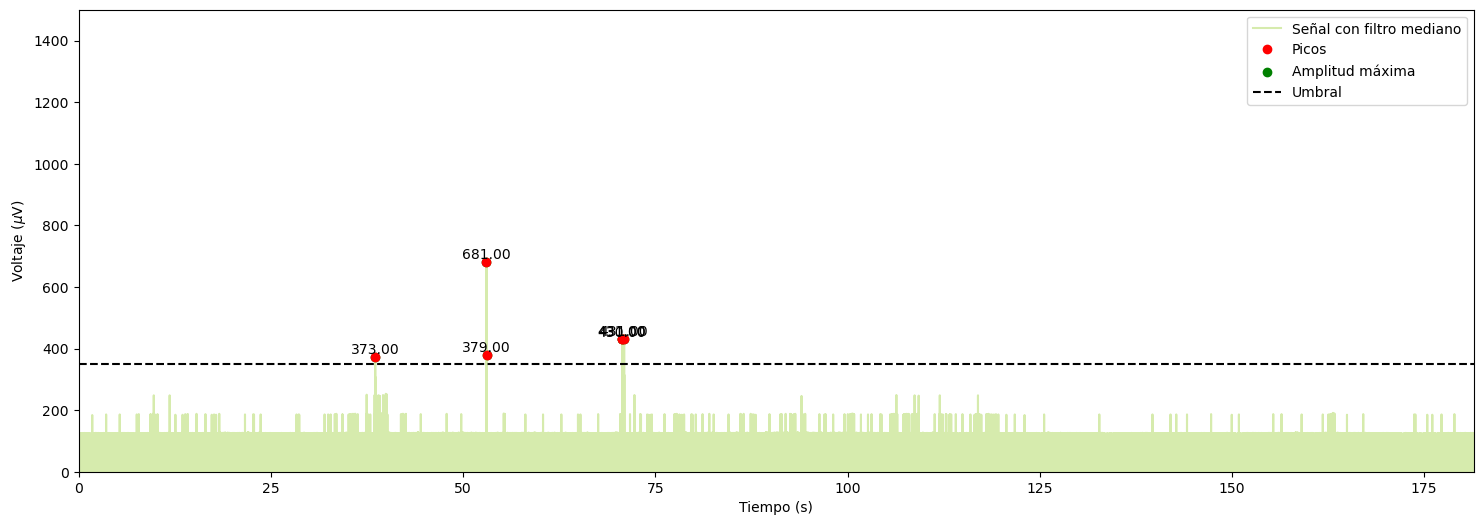

Tabla de picos y amplitudes (Canal Izquierdo):
    Tiempo (segundos)  Amplitud
0             45.9267       363
1             45.9356       368
2             46.0009       434
3             46.2335       556
4             46.2546       370
5             46.2549       370
6             46.6871       491
7             46.6874       487
8             46.6936       489
9             46.7012       370
10           109.2977       361
11           109.3782       361
12           109.3785       359
13           109.4989      1107
14           109.5060       435
15           109.5107       369
16           109.5111       429
Tabla de picos y amplitudes (Canal Derecho):
   Tiempo (segundos)  Amplitud
0            38.5620       373
1            53.0300       681
2            53.0404       379
3            70.6716       431
4            70.6718       430
5            70.9378       431


In [5]:
# Función para aplicar el filtro mediano a un canal
def apply_median_filter(channel, kernel_size):
    filtered_channel = medfilt(channel, kernel_size)
    return filtered_channel

# Aplicar filtro mediano a los canales
kernel_size = 5
filtered_channel_left = apply_median_filter(channel_left, kernel_size)
filtered_channel_right = apply_median_filter(channel_right, kernel_size)

# Función para graficar los picos y la amplitud máxima
def plot_results(channel, peaks, amplitudes, sample_rate):
    # Calcular el tiempo en segundos
    time = np.arange(len(channel)) / sample_rate

    # Crear una matriz con los valores de amplitud máxima para cada punto
    max_amplitudes = np.zeros_like(channel)
    max_amplitudes[peaks] = amplitudes

    # Graficar señal, picos y amplitud máxima
    plt.figure(figsize=(18, 6))
    plt.plot(time, channel, label='Señal con filtro mediano', color='yellowgreen', alpha=0.4)
    plt.plot(time[peaks], channel[peaks], 'ro', label='Picos')
    plt.scatter(time[peaks], max_amplitudes[peaks], c='g', label='Amplitud máxima', marker='o')
    for i, (t, a) in enumerate(zip(time[peaks], max_amplitudes[peaks])):
        plt.text(t, a, f"{a:.2f}", ha='center', va='bottom')
    plt.axhline(y=threshold, color='k', linestyle='--', label='Umbral')
    plt.xlabel('Tiempo (s)')
    plt.xlim(0,max(time))
    plt.ylabel('Voltaje ($\mu$V)')
    plt.ylim(0,1500)
    plt.legend()
    plt.show()

# Función para encontrar los picos y la amplitud máxima
def find_peaks_and_amplitude(channel):

    # Encontrar picos con el umbral
    peaks, _ = find_peaks(channel, height=threshold)

    # Calcular la amplitud máxima para los picos
    amplitudes = np.abs(channel[peaks])

    # Imprimir la amplitud máxima
    max_amplitude = np.max(amplitudes)
    print(f"Amplitud máxima: {max_amplitude}")

    # Generar tabla con los puntos encontrados y sus valores
    peaks_table = pd.DataFrame({'Tiempo (segundos)': peaks / sample_rate, 'Amplitud': amplitudes})

    return peaks, amplitudes, peaks_table

# Encontrar picos y amplitud máxima para el canal izquierdo
peaks_left, amplitudes_left, peaks_table_left = find_peaks_and_amplitude(filtered_channel_left)

# Graficar picos y amplitud máxima para el canal izquierdo
plot_results(filtered_channel_left, peaks_left, amplitudes_left, sample_rate)

# Encontrar picos y amplitud máxima para el canal derecho
peaks_right, amplitudes_right, peaks_table_right = find_peaks_and_amplitude(filtered_channel_right)

# Graficar picos y amplitud máxima para el canal derecho
plot_results(filtered_channel_right, peaks_right, amplitudes_right, sample_rate)

# Imprimir tabla de picos y amplitudes para el canal izquierdo
print("Tabla de picos y amplitudes (Canal Izquierdo):")
print(peaks_table_left)

# Imprimir tabla de picos y amplitudes para el canal derecho
print("Tabla de picos y amplitudes (Canal Derecho):")
print(peaks_table_right)

<a id='4'></a>
##  Amplitud máxima del registro EMG con filtro Butterworth

Amplitud máxima: 1011.5012850584628


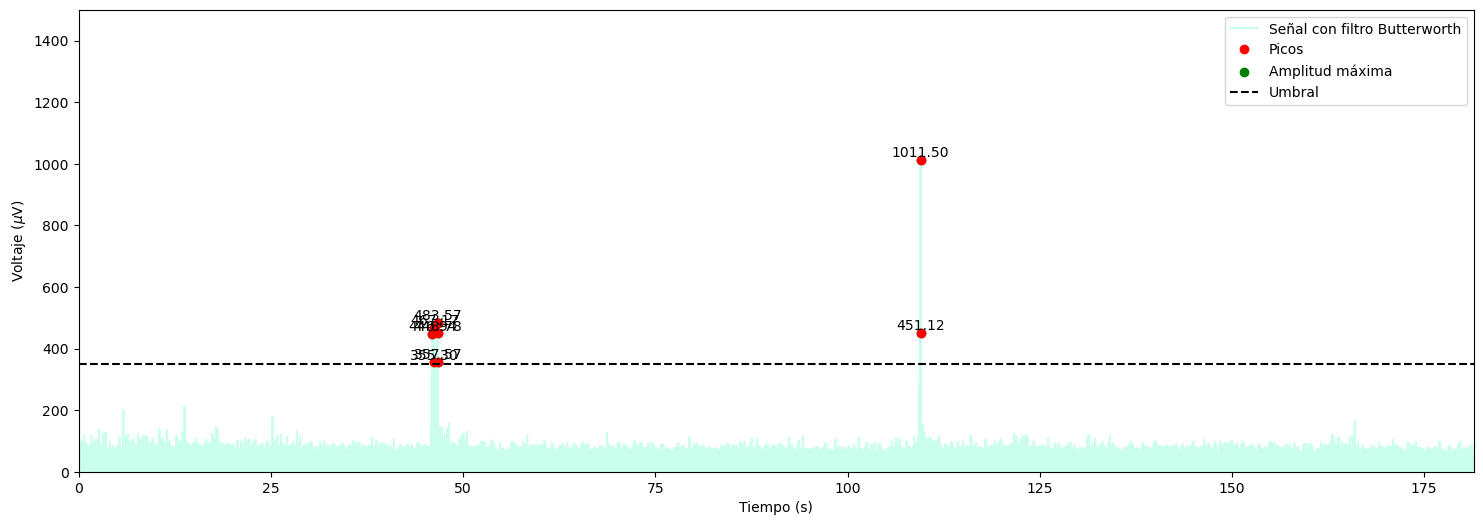

Amplitud máxima: 570.1863948988386


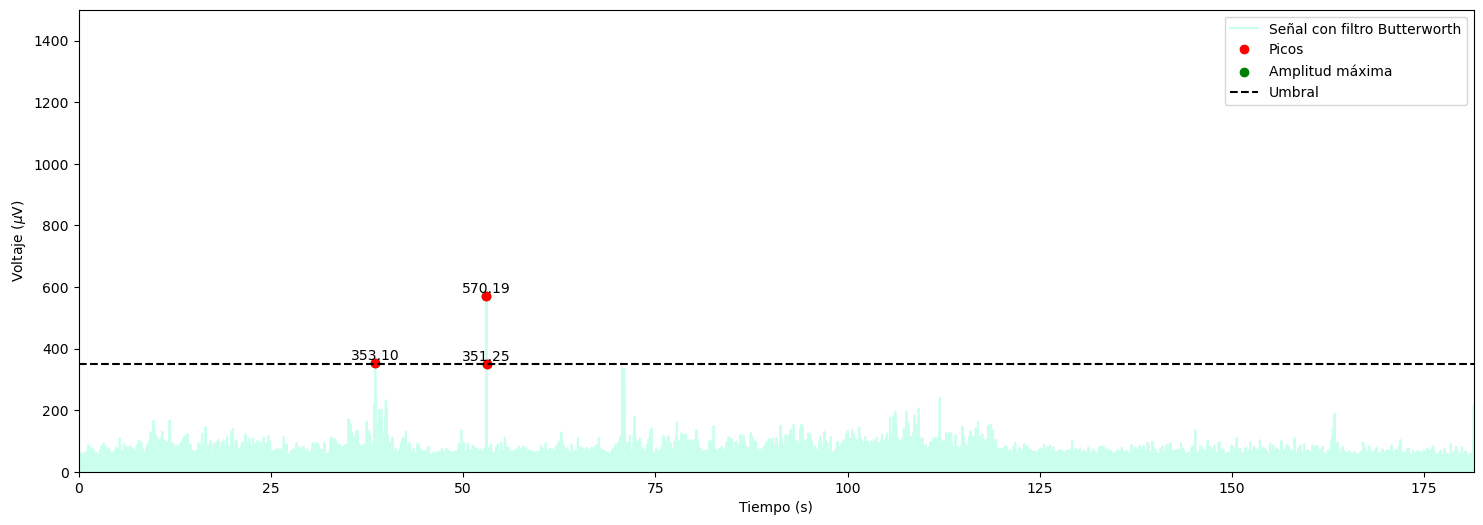

Tabla de picos y amplitudes (Canal Izquierdo):
   Tiempo (segundos)     Amplitud
0            46.0013   446.943535
1            46.2336   467.166390
2            46.2548   355.304619
3            46.6874   448.784422
4            46.6936   483.567177
5            46.7013   357.566086
6           109.4990  1011.501285
7           109.5059   451.122464
Tabla de picos y amplitudes (Canal Derecho):
   Tiempo (segundos)    Amplitud
0            38.5618  353.101583
1            53.0302  570.186395
2            53.0407  351.247972


In [6]:
# Función para aplicar el filtro Butterworth a un canal
def apply_butterworth_filter(channel):
    # Definir frecuencia de corte del filtro
    lowcut = 10
    highcut = 400
    nyquist = 0.5 * sample_rate

    # Calcular las frecuencias normalizadas de corte
    low = lowcut / nyquist
    high = highcut / nyquist

    # Aplicar el filtro Butterworth
    b, a = butter(4, [low, high], btype='band')
    filtered_channel = filtfilt(b, a, channel)

    return filtered_channel

# Aplicar filtro Butterworth a los canales
filtered_channel_left = apply_butterworth_filter(channel_left)
filtered_channel_right = apply_butterworth_filter(channel_right)

# Función para graficar los picos y la amplitud máxima
def plot_results(channel, peaks, amplitudes, sample_rate):
    # Calcular el tiempo en segundos
    time = np.arange(len(channel)) / sample_rate

    # Crear una matriz con los valores de amplitud máxima para cada punto
    max_amplitudes = np.zeros_like(channel)
    max_amplitudes[peaks] = amplitudes

    # Graficar señal, picos y amplitud máxima
    plt.figure(figsize=(18, 6))
    plt.plot(time, channel, label='Señal con filtro Butterworth', color='aquamarine', alpha=0.4)
    plt.plot(time[peaks], channel[peaks], 'ro', label='Picos')
    plt.scatter(time[peaks], max_amplitudes[peaks], c='g', label='Amplitud máxima', marker='o')
    for i, (t, a) in enumerate(zip(time[peaks], max_amplitudes[peaks])):
        plt.text(t, a, f"{a:.2f}", ha='center', va='bottom')
    plt.axhline(y=threshold, color='k', linestyle='--', label='Umbral')
    plt.xlabel('Tiempo (s)')
    plt.xlim(0,max(time))
    plt.ylabel('Voltaje ($\mu$V)')
    plt.ylim(0,1500)
    plt.legend()
    plt.show()

# Función para encontrar los picos y la amplitud máxima
def find_peaks_and_amplitude(channel):

    # Encontrar picos con el umbral
    peaks, _ = find_peaks(channel, height=threshold)

    # Calcular la amplitud máxima para los picos
    amplitudes = np.abs(channel[peaks])

    # Imprimir la amplitud máxima
    max_amplitude = np.max(amplitudes)
    print(f"Amplitud máxima: {max_amplitude}")

    # Generar tabla con los puntos encontrados y sus valores
    peaks_table = pd.DataFrame({'Tiempo (segundos)': peaks / sample_rate, 'Amplitud': amplitudes})

    return peaks, amplitudes, peaks_table

# Encontrar picos y amplitud máxima para el canal izquierdo
peaks_left, amplitudes_left, peaks_table_left = find_peaks_and_amplitude(filtered_channel_left)

# Graficar picos y amplitud máxima para el canal izquierdo
plot_results(filtered_channel_left, peaks_left, amplitudes_left, sample_rate)

# Encontrar picos y amplitud máxima para el canal derecho
peaks_right, amplitudes_right, peaks_table_right = find_peaks_and_amplitude(filtered_channel_right)

# Graficar picos y amplitud máxima para el canal derecho
plot_results(filtered_channel_right, peaks_right, amplitudes_right, sample_rate)

# Imprimir tabla de picos y amplitudes para el canal izquierdo
print("Tabla de picos y amplitudes (Canal Izquierdo):")
print(peaks_table_left)

# Imprimir tabla de picos y amplitudes para el canal derecho
print("Tabla de picos y amplitudes (Canal Derecho):")
print(peaks_table_right)

<a id='5'></a>
##  Amplitud máxima del registro EMG con filtro Savitzky-Golay

Amplitud máxima: 720.891684975863


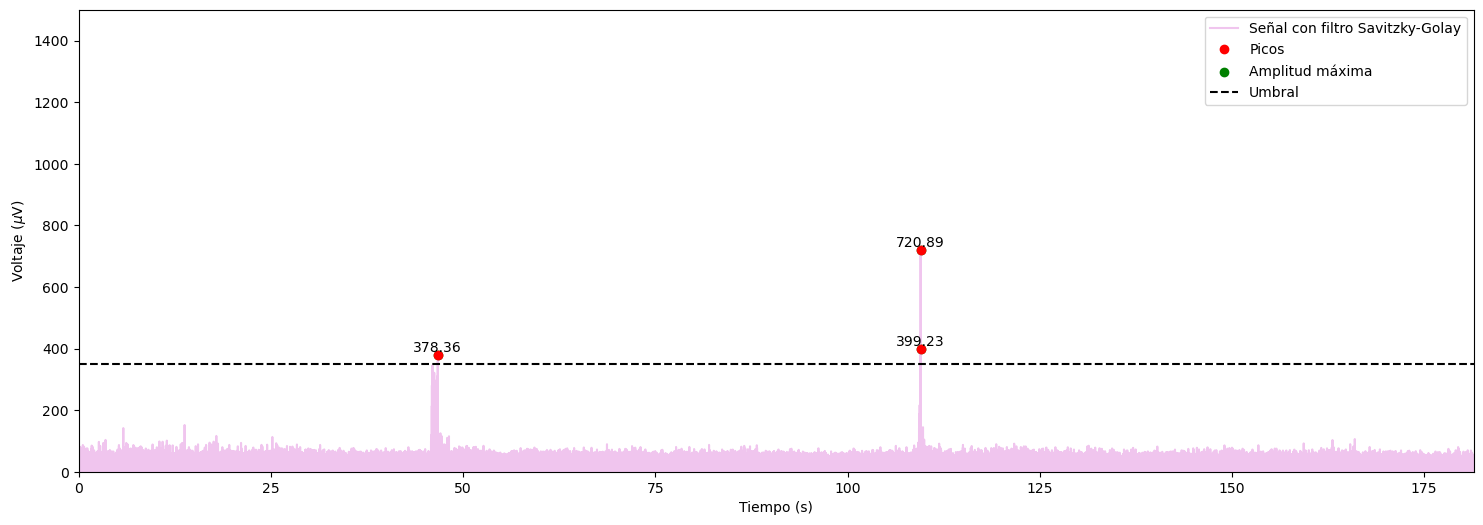

Amplitud máxima: 379.0003397585374


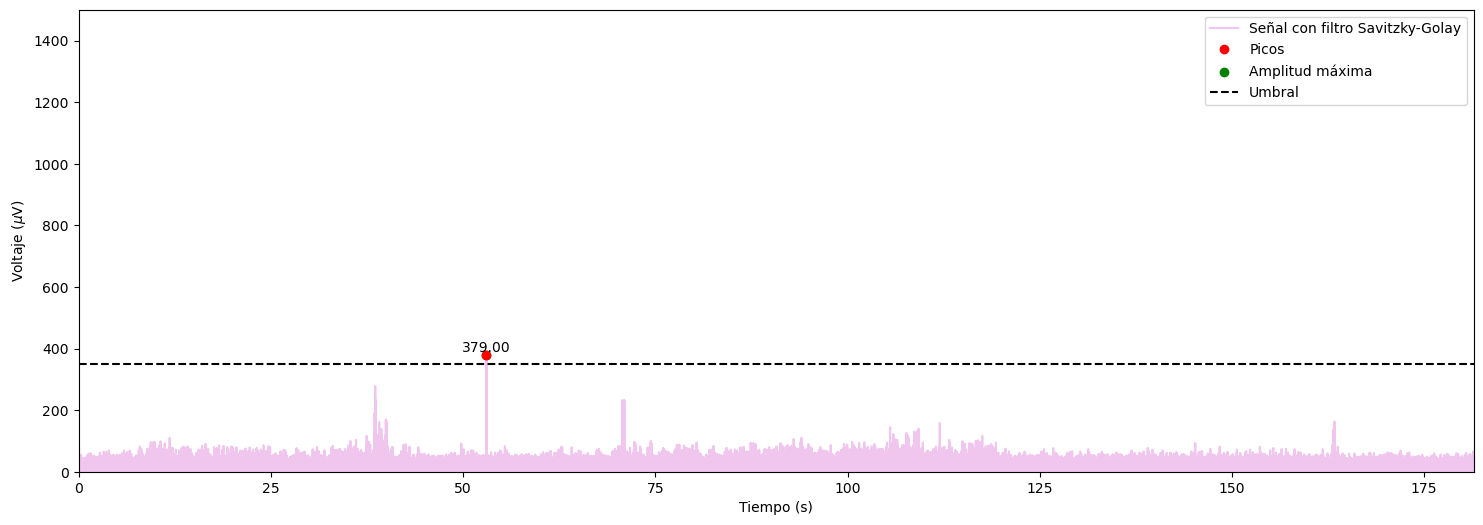

Tabla de picos y amplitudes (Canal Izquierdo):
   Tiempo (segundos)    Amplitud
0            46.6937  378.358173
1           109.4990  720.891685
2           109.5062  399.228680
Tabla de picos y amplitudes (Canal Derecho):
   Tiempo (segundos)   Amplitud
0            53.0302  379.00034


In [7]:
# Función para aplicar el filtro Savitzky-Golay a un canal
def apply_savitzky_golay(channel):
    window_length = 51
    polyorder = 2

    # Aplicar el filtro Savitzky-Golay
    filtered_channel = savgol_filter(channel, window_length, polyorder)

    return filtered_channel

# Aplicar filtro Savitzky-Golay a los canales
filtered_channel_left = apply_savitzky_golay(channel_left)
filtered_channel_right = apply_savitzky_golay(channel_right)

# Función para graficar los picos y la amplitud máxima
def plot_results(channel, peaks, amplitudes, sample_rate):
    # Calcular el tiempo en segundos
    time = np.arange(len(channel)) / sample_rate

    # Crear una matriz con los valores de amplitud máxima para cada punto
    max_amplitudes = np.zeros_like(channel)
    max_amplitudes[peaks] = amplitudes

    # Graficar señal, picos y amplitud máxima
    plt.figure(figsize=(18, 6))
    plt.plot(time, channel, label='Señal con filtro Savitzky-Golay', color='orchid', alpha=0.4)
    plt.plot(time[peaks], channel[peaks], 'ro', label='Picos')
    plt.scatter(time[peaks], max_amplitudes[peaks], c='g', label='Amplitud máxima', marker='o')
    for i, (t, a) in enumerate(zip(time[peaks], max_amplitudes[peaks])):
        plt.text(t, a, f"{a:.2f}", ha='center', va='bottom')
    plt.axhline(y=threshold, color='k', linestyle='--', label='Umbral')
    plt.xlabel('Tiempo (s)')
    plt.xlim(0,max(time))
    plt.ylabel('Voltaje ($\mu$V)')
    plt.ylim(0,1500)
    plt.legend()
    plt.show()

# Función para encontrar los picos y la amplitud máxima
def find_peaks_and_amplitude(channel):
    
    # Encontrar picos con el umbral
    peaks, _ = find_peaks(channel, height=threshold)

    # Calcular la amplitud máxima para los valores absolutos positivos
    amplitudes = channel[peaks]

    # Imprimir el valor de la amplitud máxima
    print(f"Amplitud máxima: {np.max(amplitudes)}")

    # Generar tabla con los puntos encontrados y sus valores
    peaks_table = pd.DataFrame({'Tiempo (segundos)': peaks / sample_rate, 'Amplitud': amplitudes})

    return peaks, amplitudes, peaks_table

# Encontrar picos y amplitud máxima para el canal izquierdo
peaks_left, amplitudes_left, peaks_table_left = find_peaks_and_amplitude(filtered_channel_left)

# Graficar picos y amplitud máxima para el canal izquierdo
plot_results(filtered_channel_left, peaks_left, amplitudes_left, sample_rate)

# Encontrar picos y amplitud máxima para el canal derecho
peaks_right, amplitudes_right, peaks_table_right = find_peaks_and_amplitude(filtered_channel_right)

# Graficar picos y amplitud máxima para el canal derecho
plot_results(filtered_channel_right, peaks_right, amplitudes_right, sample_rate)

# Imprimir tabla de picos y amplitudes para el canal izquierdo
print("Tabla de picos y amplitudes (Canal Izquierdo):")
print(peaks_table_left)

# Imprimir tabla de picos y amplitudes para el canal derecho
print("Tabla de picos y amplitudes (Canal Derecho):")
print(peaks_table_right)

Registros y Notebook elaborado por Alejandro Elliot Flores Oliva, licenciatura en Física Biomédica, Facultad de Ciencias, Universidad Autónoma de México (UNAM), correo: elliotflooli@ciencias.unam.mx